In [7]:
import importlib
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import sys
path_utils = r'C:\Users\gianluca.nogara\Desktop\Repo\Vaccines_Discussion_Italy\tweet_utils'
sys.path.append(path_utils)
import utils
path_files = r"C:\Users\gianluca.nogara\Desktop\Repo\Vaccines_Discussion_Italy\Italian\Files"

# Obtain new Data

In [3]:
tweets = pd.read_csv(path_files + r"\Tweets\tweets.csv", lineterminator="\n", encoding="utf-8", low_memory=False)
tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
1,1221737155380293640,1221737155380293640,Mon Jan 27 10:10:11 +0000 2020,1179711277,Grace_1207,False,Thu Feb 14 16:37:35 +0000 2013,"Oggi sono arrivati loro, 3 femminucce e 1 masc...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'LidaSezOlbia', 'name': 'Lida...",[],[],[],NaN,NaN,NaN
2,1221730009989120001,1221730009989120001,Mon Jan 27 09:41:47 +0000 2020,115121530,MarisaMinervini,False,Wed Feb 17 17:40:09 +0000 2010,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN
3,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,...,NaN,[],[],[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],[],NaN,NaN,NaN
4,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'Annalisa3073', 'name': 'Anna...",[],[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,[],[],"[{'screen_name': 'borghi_claudio', 'name': 'Cl...",[],[],[],102577.0,1060.0,1114.0
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,Wed Sep 02 14:03:01 +0000 2009,[],[],[],"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],[],79297.0,772.0,893.0
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],[],"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],[],655.0,226.0,55.0
4053199,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,"[{'text': 'lariachetira', 'indices': [14, 27]}]",[],"[{'screen_name': 'valy_s', 'name': 'Valeria S....",[],[],[],517677.0,13671.0,20847.0


In [5]:
df_urls = tweets.loc[tweets['urls'] != '[]']
df_urls = [x.split()[3].translate({ord("'"): None}).replace(",","") for x in df_urls["urls"]]
df_urls = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in df_urls]
df_urls = list(pd.Series(df_urls).dropna())
lst = []
for i in df_urls:
    if 'playlist' in i:
        lst.append(i)
for i in df_urls:
    if 'www.youtube.com/channel' in i:
        lst.append(i)
l3 = [x for x in df_urls if x not in lst]
l3 = list(set(l3))
df_yt_domains = pd.DataFrame(l3, columns=["URL"]).to_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Italian\files\domains_yt.csv",
                                                         line_terminator="\n", index=False, encoding='utf-8')

In [6]:
# novax = pd.read_csv(path_files + "bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# novax = list(novax["screen_name"])

In [7]:
# novax_df = tweets[(tweets["user_screen_name"].isin(novax)) | (tweets["rt_user_screen_name"].isin(novax))]
# del tweets

In [10]:
# len(novax_df)

In [9]:
# novax_df.to_csv(path_files + "Tweets/novax_df.csv", line_terminator="\n", index=False, encoding="utf-8")

In [11]:
# novax_df = pd.read_csv(path_files + "Tweets/novax_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")

In [85]:
# np.mean(pd.Series(novax_df["user_screen_name"]).value_counts())

In [86]:
# louvain = pd.read_csv(path_files + "louvain.csv")
# louvain

In [87]:
# deg = pd.read_csv(path_files + "degree.csv")
# deg

In [88]:
# users_nt = deg.merge(louvain, left_on="user", right_on="name", how="left")[["user", "community", "degree"]]
# np.mean(users_nt[users_nt["user"].isin(list(set(novax_df["user_screen_name"])))]["degree"])

In [89]:
# setA = set(users_nt["user"])
# setB = set(novax_df["user_screen_name"])
# filtered = setA.difference(setB)
# filtered = list(filtered)
# filtered_df = users_nt[(users_nt["degree"]>=10) & (users_nt["user"].isin(filtered)) & (users_nt["community"]!=4)]

In [90]:
# names = random.choices(list(filtered_df["user"]), k=100)

In [91]:
# np.mean(filtered_df[filtered_df["user"].isin(names)]["degree"])

In [92]:
# filtered_df[filtered_df["user"].isin(names)]

In [93]:
# tweets = pd.read_parquet(path_files + "Tweets/tweets.parquet", engine="fastparquet")
# users_df = tweets[(tweets["user_screen_name"].isin(names)) | (tweets["rt_user_screen_name"].isin(names))]
# del tweets
# len(users_df)

In [94]:
# users_df.to_csv(path_files + "Tweets/users_df.csv", line_terminator="\n", index=False, encoding="utf-8")
# users_df

In [104]:
# users_df = pd.read_csv(path_files + "Tweets/users_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# other = pd.read_csv(path_files + "other_users.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# other = list(other["name"])

# Read data

In [18]:
novax = pd.read_csv(path_files + r"\users\bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
novax = list(novax["screen_name"])
novax_df = pd.read_csv(path_files + r"\Tweets\novax_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
users_df = pd.read_csv(path_files + r"\Tweets\users_df.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
other = pd.read_csv(path_files + r"\users\other_users.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
other = list(other["name"])

In [19]:
toxic = pd.read_csv(r"..\files\tweets\tweets_toxicity.csv", lineterminator="\n",low_memory=False, encoding="utf-8", usecols=["id", "toxicity"])
sentiment = pd.read_csv(r"..\script_directory_output\toxic_texts\toxic_multiscore_diego\merged.csv", lineterminator="\n",
                        low_memory=False, encoding="utf-8", usecols=["id", "sentiment", "emotion"])
in_deg = pd.read_csv(r"..\files\networks\in_degree.csv")
in_deg.rename(columns={"user": "user_screen_name", "degree": "out_degree"}, inplace=True)
community = pd.read_csv(r"..\files\networks\louvain.csv")
community.rename(columns={"name": "user_screen_name"}, inplace=True)
novax_df = novax_df.merge(toxic, on="id", how="left")
novax_df = novax_df.merge(sentiment, on="id", how="left")
novax_df = novax_df.merge(in_deg, on="user_screen_name", how="left")
novax_df = novax_df.merge(community, on="user_screen_name", how="left")
users_df = users_df.merge(toxic, on="id", how="left")
users_df = users_df.merge(sentiment, on="id", how="left")
users_df = users_df.merge(in_deg, on="user_screen_name", how="left")
users_df = users_df.merge(community, on="user_screen_name", how="left")

In [21]:
novax_activities = novax_df[novax_df["user_screen_name"].isin(novax)]
users_activities = users_df[users_df["user_screen_name"].isin(other)]

In [22]:
print(f"len all novax interactions (active + passive): {len(novax_df)}")
print(f"len only novax active interaction: {len(novax_activities)}")
print(f"len all users interactions (active + passive): {len(users_df)}")
print(f"len only users active interaction: {len(users_activities)}")

len all novax interactions (active + passive): 351154
len only novax active interaction: 83637
len all users interactions (active + passive): 20751
len only users active interaction: 6884


# Check for URLs

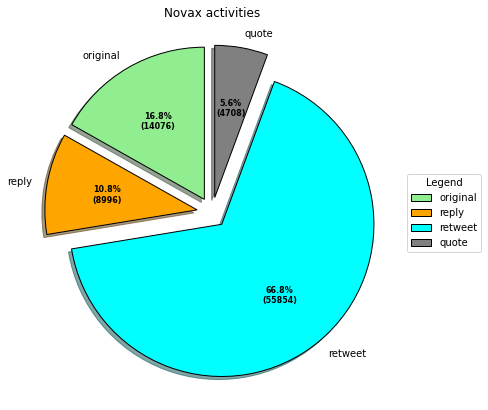

In [23]:
x = utils.split(novax_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Novax activities", labels, values)

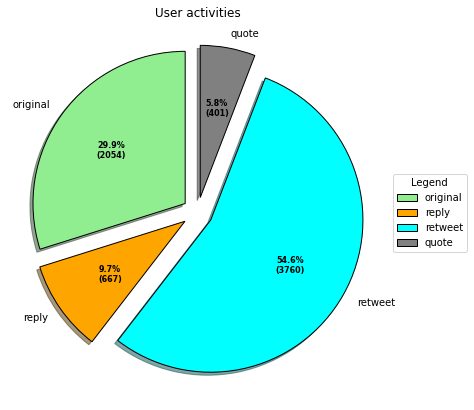

In [24]:
x = utils.split(users_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("User activities", labels, values)

# Hashtags

In [36]:
#import importlib
#importlib.reload(utils)

<module 'utils' from 'C:\\Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils\\utils.py'>

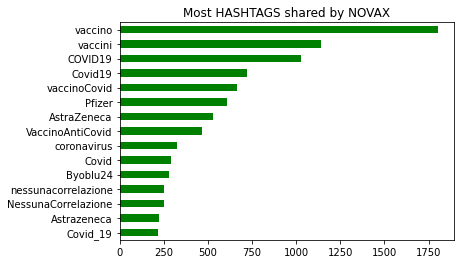

In [25]:
val = pd.Series(utils.hashtag_extraction(novax_activities)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most HASHTAGS shared by NOVAX')
ax.invert_yaxis()
plt.show()

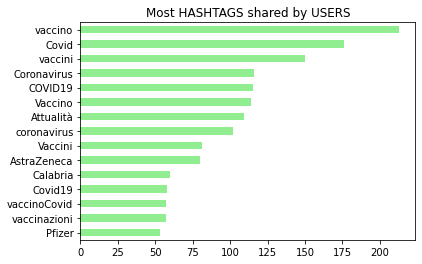

In [26]:
val = pd.Series(utils.hashtag_extraction(users_activities)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='lightgreen')
ax.set_title('Most HASHTAGS shared by USERS')
ax.invert_yaxis()
plt.show()

# Urls

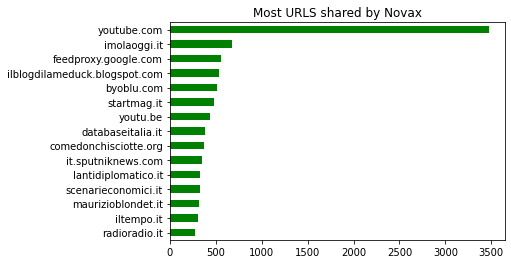

In [27]:
x = utils.extract_domain_list(novax_activities)
novax_urls = []
lst_not_plot = ["twitter.com", "bit.ly", "ow.ly"]
cont = 0
for i in x:
    if i != []:
        for j in i:
            if (j not in lst_not_plot):
                novax_urls.append(j)
val = pd.Series(novax_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most URLS shared by Novax')
ax.invert_yaxis()
plt.show()

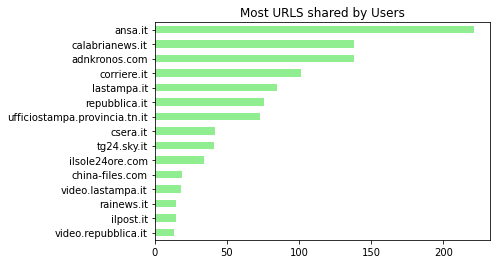

In [28]:
x = utils.extract_domain_list(users_activities)
users_urls = []
lst_not_plot = ["dlvr.it", "twitter.com", "tinyurl.com", "trib.al", "bit.ly", "ow.ly"]
cont = 0
for i in x:
    if i != []:
        for j in i:
            if j not in lst_not_plot:
                users_urls.append(j)
val = pd.Series(users_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='lightgreen')
ax.set_title('Most URLS shared by Users')
ax.invert_yaxis()
plt.show()

# YouTube

In [29]:
value = []
for i in tqdm(novax_activities.itertuples()):
    url_exp = i.urls.split(" ")
    lst_inside = []
    for exp in range(len(url_exp)):
        if url_exp[exp] == "'expanded_url':":
            lst_inside.append((url_exp[exp+1][1:-2], i.id))
    value.append(lst_inside)
count = 0
urls = []
ids = []
for i in value:
    for j in i:
        if "youtu" in j[0]:
            urls.append(j[0])
            ids.append(j[1])
df_domains_ids = pd.DataFrame(list(zip(ids, urls)), columns=['id', 'url'])
df_domains_ids.drop_duplicates(subset=["id"], keep="last", inplace=True)
df_domains_ids

,id,url
0,1222261604563243008,https://youtu.be/DouCbWbLa7E
1,1222261591665672193,https://youtu.be/AwRqhGfRAlc
2,1222261627699056644,https://youtu.be/x4iOo1VWKIg
3,1222226752426205184,https://youtu.be/DouCbWbLa7E
4,1222226914426920966,https://youtu.be/AwRqhGfRAlc
...,...,...
3937,1394280236230000648,https://youtu.be/_1KsDNQWrgU
3938,1394292346473390086,https://youtu.be/_1KsDNQWrgU
3939,1394304704931368964,https://youtu.be/O558Dmc2WPg
3940,1394546856827392000,https://www.youtube.com/watch?v=rzYk7-RoTow


In [30]:
yt_info = pd.read_csv("../script_directory_output/youtube/youtube_info.csv",
                      lineterminator="\n", low_memory=False, encoding="utf-8")
yt_info.drop_duplicates(subset=["url"], keep="last", inplace=True)
yt_info

,url,available,duration,title,description,views,likes,comments,channel,pubblication_date
0,https://www.youtube.com/watch?v=jx0rnKy1EbQ,True,59:47,Vaccini e Covid-19: intervista alla dottoressa...,Recentemente abbiamo incontrato la farmacologa...,55957.0,1430.0,NaN,Antimafia Duemila,2020-07-25T09:49:40Z
1,https://www.youtube.com/watch?v=wdFWYEUBMEU&t=7s,True,8:9,Alvise Biffi a Tgcom 24: aziende pronte a part...,Il Presidente della Piccola Industria di Confi...,34.0,2.0,0.0,Confindustria Lombardia,2021-04-06T07:48:34Z
2,https://youtu.be/ykjQ6GZdjz0,True,6:38,Weekend straordinario di vaccinazione anti Cov...,Sul canale televideoagrigento1 vengono caricat...,36.0,0.0,0.0,TeleVideo Agrigento,2021-03-22T12:57:38Z
3,https://youtu.be/hp0md7PJIeU,True,21,"Vaccino, ecco gli effetti: da uomo a cavallo i...",NaN,9570.0,23.0,3.0,News Affaritaliani.it,2021-01-02T17:55:49Z
4,https://youtu.be/tQe5-DzAPn0,True,4:39,#Signor #Gesù noi T'adoriam (Arrangiamento di ...,#Adorare Gesù è la risposta di #fede e di #amo...,2276.0,15.0,3.0,Grazia Felini,2021-03-20T11:00:14Z
...,...,...,...,...,...,...,...,...,...,...
6614,https://youtu.be/PRg0IBqyFsM,True,13:1,"""FARMACO SI RIVELA STRAORDINARIO CONTRO IL COV...",“L’#ivermectina è un #farmaco che contro il #S...,89268.0,6419.0,613.0,Radio Radio TV,2021-03-11T11:33:11Z
6615,https://youtu.be/tC84wONn1ZA,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6616,https://www.youtube.com/watch?v=Wq4CB9xD86s&ab...,True,3:5,"Sang contaminé : il y a 20 ans, trois ministre...",Abonnez-vous http://bit.ly/inaactu\nRetour ve...,17113.0,250.0,26.0,INA Actu,2019-02-08T08:57:53Z
6617,https://www.youtube.com/post/Ugxlpuof9IEWrgRHT...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
novax_yt = yt_info.merge(df_domains_ids, on="url", how='left')
novax_yt = novax_yt[novax_yt['id'].notna()]
novax_yt

,url,available,duration,title,description,views,likes,comments,channel,pubblication_date,id
8,https://youtu.be/eqvFlgydWVw,True,1:46,"Abbiategrasso, sette infermieri vaccinati a ge...","All’ospedale di Abbiategrasso, in provincia di...",93879.0,532.0,757.0,Fanpage.it,2021-04-03T12:11:43Z,1.394561e+18
24,https://www.youtube.com/watch?v=FI3GGuDINhc,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274390e+18
25,https://www.youtube.com/watch?v=FI3GGuDINhc,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274390e+18
26,https://www.youtube.com/watch?v=FI3GGuDINhc,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274390e+18
27,https://www.youtube.com/watch?v=FI3GGuDINhc,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.274390e+18
...,...,...,...,...,...,...,...,...,...,...,...
9932,https://www.youtube.com/watch?v=sLot8rboFYM,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355968e+18
9933,https://www.youtube.com/watch?v=sLot8rboFYM,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355968e+18
9934,https://www.youtube.com/watch?v=sLot8rboFYM,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.355968e+18
9938,https://www.youtube.com/watch?v=AAVtxmlzjok&fe...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.260829e+18


In [32]:
available = novax_yt[novax_yt["available"]==True]
print(f"{len(available)/len(novax_yt)}")
pd.Series(available["channel"]).value_counts()

0.7492291880781089


paolo barnard                          803
Gianluigi Paragone                     403
La7 Attualità                          322
The Wreport. Indywrep Indygraf WREP    139
Il Sole 24 ORE                         121
                                      ... 
Paolo Becchi                             1
CG Entertainment                         1
Dentrolanotizia- Roby Master 2           1
La Cura                                  1
Betobahia Ciapa la Galeina               1
Name: channel, Length: 113, dtype: int64